Results for Logistic Regression:
Accuracy: 0.9502
Precision: 0.9535
Recall: 0.9957
F1 Score: 0.9741
ROC AUC: 0.9630


Results for Random Forest:
Accuracy: 0.9440
Precision: 0.9440
Recall: 1.0000
F1 Score: 0.9712
ROC AUC: 0.9625


Results for Naive Bayes:
Accuracy: 0.9420
Precision: 0.9430
Recall: 0.9989
F1 Score: 0.9701
ROC AUC: 0.8372


Results for Decision Tree:
Accuracy: 0.9308
Precision: 0.9653
Recall: 0.9612
F1 Score: 0.9632
ROC AUC: 0.6949


Results for SVM:
Accuracy: 0.9532
Precision: 0.9546
Recall: 0.9978
F1 Score: 0.9757
ROC AUC: 0.9634


Results for K-Nearest Neighbors:
Accuracy: 0.9502
Precision: 0.9545
Recall: 0.9946
F1 Score: 0.9741
ROC AUC: 0.8259




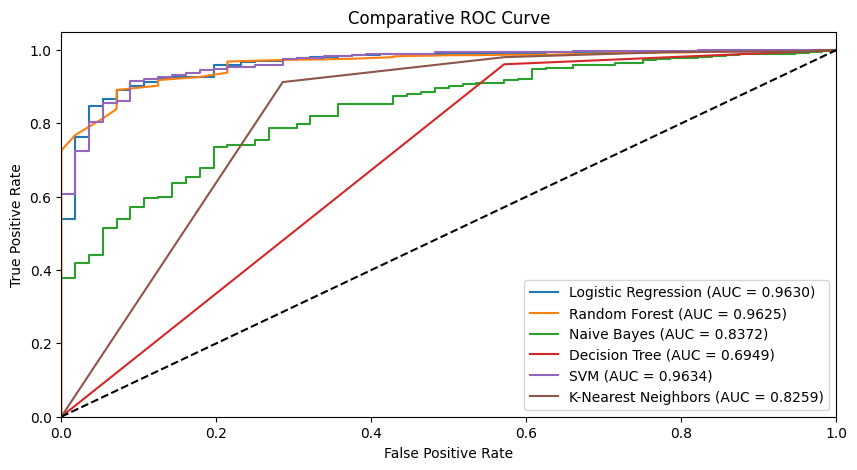

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# train-test split
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity

dfSimpleBinary = pd.read_csv('amazon_reviews_simpleBinary.csv')
X = tfidf.fit_transform(dfSimpleBinary['reviewText'])

# y = Etiqueta
y = dfSimpleBinary['overall']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

# Apply TF-IDF on the binary dataset
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dfSimpleBinary['reviewText'])

# y = Binary labels
y = dfSimpleBinary['overall']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        print(f"{metric}: {value:.4f}")
    print("\n")

# Plot ROC curve comparison
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar dataset
dfCleaned = pd.read_csv('amazon_reviews_Cleaned.csv')

# Apply TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dfCleaned['reviewText'])
y = dfCleaned['overall'].astype(int)

# Separar en Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a buscar para cada modelo
param_grid = {
    "Logistic Regression (OvR)": {
        'estimator__C': [0.1, 1, 10],
        'estimator__solver': ['newton-cg', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20],
        'criterion': ['gini']
    },
    "SVM (OvR)": {
        'estimator__C': [0.1, 1, 10],
        'estimator__kernel': ['linear', 'rbf']
    },
    "K-NN": {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Crear los modelos base
models = {
    "Logistic Regression (OvR)": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (OvR)": OneVsRestClassifier(SVC(probability=True)),
    "K-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Buscar los mejores hiperparámetros
best_params = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_

# Imprimir los mejores hiperparámetros encontrados
for model_name, params in best_params.items():
    print(f"Mejores hiperparámetros para {model_name}:")
    print(params)
    print("\n")

c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Program Files\Python311\Lib\site

Mejores hiperparámetros para Logistic Regression (OvR):
{'estimator__C': 1, 'estimator__solver': 'newton-cg'}


Mejores hiperparámetros para Random Forest:
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}


Mejores hiperparámetros para SVM (OvR):
{'estimator__C': 1, 'estimator__kernel': 'linear'}


Mejores hiperparámetros para K-NN:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


Mejores hiperparámetros para Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}




Resultados para Logistic Regression:
Accuracy: 0.9674
Precision: 0.9745
Recall: 0.9914
F1 Score: 0.9829
ROC AUC: 0.9706


Resultados para Random Forest:
Accuracy: 0.9440
Precision: 0.9440
Recall: 1.0000
F1 Score: 0.9712
ROC AUC: 0.9566


Resultados para Naive Bayes:
Accuracy: 0.9420
Precision: 0.9430
Recall: 0.9989
F1 Score: 0.9701
ROC AUC: 0.8372


Resultados para Decision Tree:
Accuracy: 0.9318
Precision: 0.9694
Recall: 0.9579
F1 Score: 0.9636
ROC AUC: 0.7290


Resultados para SVM:
Accuracy: 0.9654
Precision: 0.9715
Recall: 0.9924
F1 Score: 0.9819
ROC AUC: 0.9607


Resultados para K-Nearest Neighbors:
Accuracy: 0.9502
Precision: 0.9545
Recall: 0.9946
F1 Score: 0.9741
ROC AUC: 0.8273




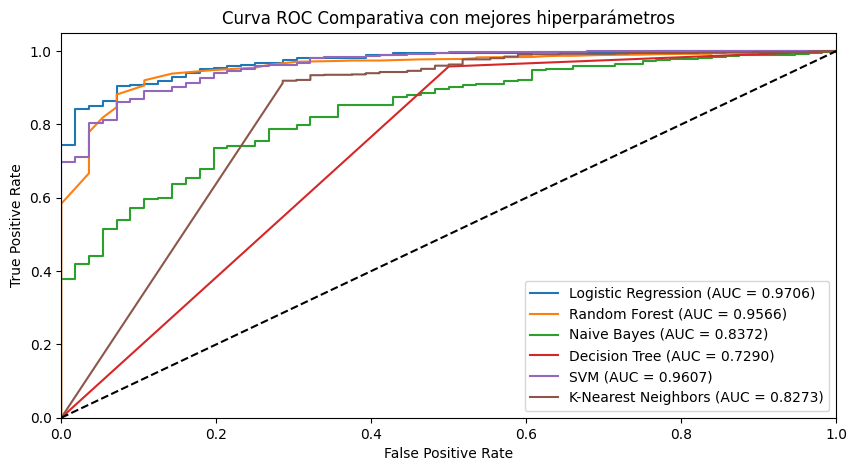

In [3]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preprocesar los datos
dfSimpleBinary = pd.read_csv('amazon_reviews_simpleBinary.csv')
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dfSimpleBinary['reviewText'])
y = dfSimpleBinary['overall']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelos con los mejores hiperparámetros
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=10, solver='newton-cg'),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='sqrt'),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True, C=1, kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
}

# Diccionario para almacenar los resultados
results = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Guardar los resultados
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

# Imprimir los resultados
for model_name, metrics in results.items():
    print(f"Resultados para {model_name}:")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        print(f"{metric}: {value:.4f}")
    print("\n")

# Crear el gráfico comparativo de la curva ROC
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa con mejores hiperparámetros')
plt.legend(loc="lower right")
plt.show()


Resultados para Logistic Regression:
Accuracy: 0.9298
Precision: 0.9322
Recall: 0.9955
F1 Score: 0.9628
ROC AUC: 0.9405


Resultados para Random Forest:
Accuracy: 0.9186
Precision: 0.9198
Recall: 0.9978
F1 Score: 0.9572
ROC AUC: 0.9376




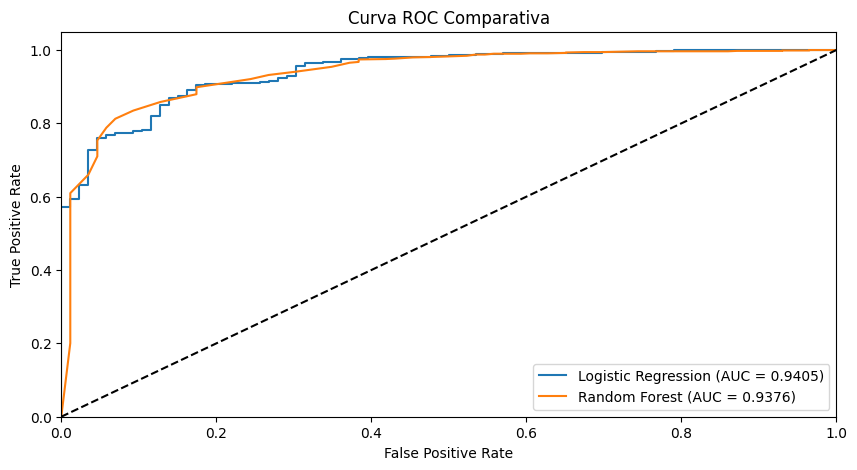

In [4]:
# CREAR NUEVO DATASET BINARIO CON THRESHOLD = 3 y aplicar los modelos implementados hasta ahora para ver si mejora
dfCleaned = pd.read_csv('amazon_reviews_cleaned.csv')
dfSimpleBinary_threshold3 = dfCleaned.copy()
dfSimpleBinary_threshold3['overall'] = dfSimpleBinary_threshold3['overall'].apply(lambda x: 1 if x > 3 else 0)
dfSimpleBinary_threshold3['overall'].value_counts()
dfSimpleBinary_threshold3.head(100)
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X_threshold3 = tfidf.fit_transform(dfSimpleBinary['reviewText'])

# y = Etiqueta
y_threshold3 = dfSimpleBinary_threshold3['overall']
X_train_threshold3, X_test_threshold3, y_train_threshold3, y_test_threshold3 = train_test_split(X_threshold3, y_threshold3, test_size=0.2, random_state=42)

# Entrenar modelos para threshold = 3
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Diccionario para almacenar los resultados
results = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_threshold3, y_train_threshold3)
    # Predecir en el conjunto de prueba
    y_pred_threshold3 = model.predict(X_test_threshold3)
    y_pred_prob_threshold3 = model.predict_proba(X_test_threshold3)[:, 1]
    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test_threshold3, y_pred_threshold3)
    precision = precision_score(y_test_threshold3, y_pred_threshold3)
    recall = recall_score(y_test_threshold3, y_pred_threshold3)
    f1 = f1_score(y_test_threshold3, y_pred_threshold3)
    fpr, tpr, _ = roc_curve(y_test_threshold3, y_pred_prob_threshold3)
    roc_auc = auc(fpr, tpr)
    # Guardar los resultados
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

# Imprimir los resultados
for model_name, metrics in results.items():
    print(f"Resultados para {model_name}:")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        print(f"{metric}: {value:.4f}")
    print("\n")

# Crear el gráfico comparativo de la curva ROC
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa')
plt.legend(loc="lower right")
plt.show()